# Web Traffic Time Series Analysis

##Final Project code

IST652 - Scripting for Data Analysis M001: Fall 2023

Anjana Sowmya Puvvada

Srushtee pawar


## Import the necessary libraries.

In [ ]:
# IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")
from numpy.fft import *
%matplotlib inline

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install kaggle

## Data Extraction

we are extracting the data here using the API command from the kaggle .we have created a new token and inputed the required username and key data from the new token file .

In [ ]:
# Setting Kaggle API key using environment variables
os.environ['KAGGLE_USERNAME'] = "anjanasyr"  # Replace with your Kaggle username
os.environ['KAGGLE_KEY'] = "b5bd0ccf7af749dd22233ed82107fd71"  # Replace with your Kaggle API key

In [ ]:
# Downloading competition data using the Kaggle CLI command
!kaggle competitions download -c web-traffic-time-series-forecasting
# Unzipping the competition data using the 'unzip' command
!unzip -q web-traffic-time-series-forecasting.zip -d /content


 99% 575M/583M [00:09<00:00, 70.9MB/s]
100% 583M/583M [00:09<00:00, 61.3MB/s]


we have used the API command to extract the data and later unzipped the zipped dowloaded file ,which is later easily accesable .

In [ ]:
# Replace 'dataset-name.csv' with the actual name of your CSV file
train_1 = pd.read_csv('train_1.csv.zip')
train_2 = pd.read_csv('train_2.csv.zip')
key_2=pd.read_csv('key_2.csv.zip')

# Display the first few rows of the DataFrame
train_1.head()
key_2.head()
train_1= train_1.fillna(0)
train_2= train_2.fillna(0)

In [ ]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('train_1.csv.zip')
df.head(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


Checking Null values

In [ ]:
# Applying a lambda function to check and count missing values in each column of the 'train' DataFrame
# The 'sum(x.isnull())' part counts the number of missing values for each column, and 'apply' applies this to each column
df.apply(lambda x: sum(x.isnull())).head()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
dtype: int64

 I'm going to fill the NaN values with 0 since the dataset does not distinguish between 0 and missing. We'll have to deal with these later.

Transforming Data: Rearranging Rows and Columns for Time Series Analysis

In [ ]:
# Transpose rows and columns
df = df.T
df = df.reset_index()
# Capture 1st rows of data and make it column header
column_header = df.iloc[0,:].values

df.columns = column_header
# Drop 1st row
df = df.drop(0, axis = 0)
# Rename Page column to Date column
df = df.rename(columns = {"Page" : "Date"})
# Check data type of date column
print(df["Date"].dtype)
# Convert Date column to datetime datatype
df["Date"] = pd.to_datetime(df["Date"])
# Check Date column datatype again
print(df["Date"].dtype)
# Set Date column as index
df = df.set_index("Date")
df.head()

object
datetime64[ns]


,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The page names contain the Wikipedia project (e.g. en.wikipedia.org), type of access (e.g. desktop) and type of agent (e.g. spider).
In other words, each article name has the following format: 'name_project_access_agent' (e.g. 'AKB48_zh.wikipedia.org_all-access_spider').**

# Q1. How Data is distributed based on different types Wikipedia project (e.g. en.wikipedia.org), type of access (e.g. desktop) and type of agent (e.g. spider)

# **Type of access**

In [ ]:
# Finding number of access types and agents
access_types = []
agents = []
for column in df.columns:
    access_type = column.split("_")[-2]
    agent = column.split("_")[-1]
    access_types.append(access_type)
    agents.append(agent)

In [ ]:
# Counting access types
from collections import Counter
access_dict = Counter(access_types)
access_dict

Counter({'all-access': 74315, 'desktop': 34809, 'mobile-web': 35939})

In [ ]:
access_df = pd.DataFrame({"Access type" : access_dict.keys(),
                          "Number of columns" : access_dict.values()})
access_df

,Access type,Number of columns
0,all-access,74315
1,desktop,34809
2,mobile-web,35939


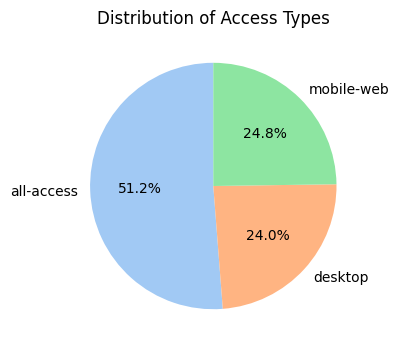

In [ ]:
import matplotlib.pyplot as plt
# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(access_df["Number of columns"], labels=access_df["Access type"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribution of Access Types")
plt.show()


The pie chart shows that the majority of access to the Wikipedia comes from all other access types (such as tablet and tablet web access)(51.2%). Mobile web access accounts for 24.8% of access, and desktop computers account for the remaining 24%.

**Desktop**: This includes access from traditional desktop computers, as well as laptops and other devices that are typically used in a desktop-like setting.

**Mobile web**: This includes access from smartphones and other mobile devices that are using a web browser.

**All other access**: This includes access from devices such as tablets, e-readers, and smart TVs. It also includes access from non-web browsers, such as Wikipedia apps.

# **Type of Agent**

In [ ]:
agents_dict = Counter(agents)
agents_dict

Counter({'spider': 34913, 'all-agents': 110150})

In [ ]:
agents_df = pd.DataFrame({"Agent" : agents_dict.keys(),
                          "Number of columns" : agents_dict.values()})
agents_df

,Agent,Number of columns
0,spider,34913
1,all-agents,110150


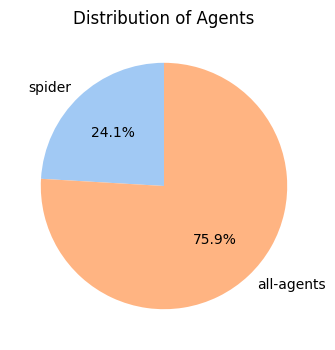

In [ ]:
import matplotlib.pyplot as plt

# Assuming agents_df is already defined

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(agents_df["Number of columns"], labels=agents_df["Agent"], autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribution of Agents")
plt.show()


The pie chart shows the distribution of access types based on the type of agent. An agent is a computer program that acts on behalf of a user. In the context of the pie chart, agents are used to access the Wikipedia in ways that are not done by humans. For example, search engine crawlers are agents that access theWikipedia to index its content.

The pie chart shows that the majority of agent access to the Wikipedia comes from Other types of agents, such as Wikipedian bots and spam bots (75.2%). Search engine crawlers, account for the remaining 24.8%.

Here is a breakdown of the agent types:

**Search engine crawlers**: These are bots that are used by search engines to index the content of the Wikipedia.

**Other agents**: This includes bots that are used for tasks such as editing Wikipedia articles, detecting spam, and monitoring website performance.

Our data has NAN values,lets check their distribution in our analysis

In [ ]:
# Identifying number of columns with null values with respect to agents
def count_null_columns(pattern):
    pattern_columns = [column for column in df.columns if pattern in column]
    return len(df[pattern_columns].isnull().sum()[df[pattern_columns].isnull().sum() > 0])

no_of_cols_with_nulls = [count_null_columns(agent) for agent in agents_df["Agent"]]

agents_df["No of columns with nulls"] = no_of_cols_with_nulls

# Calculating percentage of null values in agents
agents_df["% of nulls"] = agents_df["No of columns with nulls"] / agents_df["Number of columns"] * 100

In [ ]:
agents_df

,Agent,Number of columns,No of columns with nulls,% of nulls
0,spider,34913,5904,16.910606
1,all-agents,110150,21882,19.865638


In [ ]:
no_of_cols_with_nulls = [count_null_columns(access_types) for access_types in access_df["Access type"]]
access_df["No of columns with nulls"] = no_of_cols_with_nulls
access_df["% of nulls"] = access_df["No of columns with nulls"] / access_df["Number of columns"] * 100

access_df

,Access type,Number of columns,No of columns with nulls,% of nulls
0,all-access,74315,14808,19.925991
1,desktop,34809,6647,19.095636
2,mobile-web,35939,6331,17.615960


From above analysis, Percentage of missing values in each access type is almost same. So there is no pattern in missing values.

# **Type of Project**

In [ ]:
df.columns[86543]

'種田梨沙_ja.wikipedia.org_desktop_all-agents'

In [ ]:
projects = []
for column in df.columns:
    project = column.split("_")[-3] # Extracting language code from column name (topic name)
    projects.append(project)

In [ ]:
from collections import Counter
project_dict = Counter(projects)
project_dict

Counter({'zh.wikipedia.org': 17229,
         'fr.wikipedia.org': 17802,
         'en.wikipedia.org': 24108,
         'commons.wikimedia.org': 10555,
         'ru.wikipedia.org': 15022,
         'www.mediawiki.org': 7300,
         'de.wikipedia.org': 18547,
         'ja.wikipedia.org': 20431,
         'es.wikipedia.org': 14069})

In [ ]:
project_df = pd.DataFrame({"Project" : project_dict.keys(),
                           "Number of columns" : project_dict.values()})

project_df

,Project,Number of columns
0,zh.wikipedia.org,17229
1,fr.wikipedia.org,17802
2,en.wikipedia.org,24108
3,commons.wikimedia.org,10555
4,ru.wikipedia.org,15022
5,www.mediawiki.org,7300
6,de.wikipedia.org,18547
7,ja.wikipedia.org,20431
8,es.wikipedia.org,14069


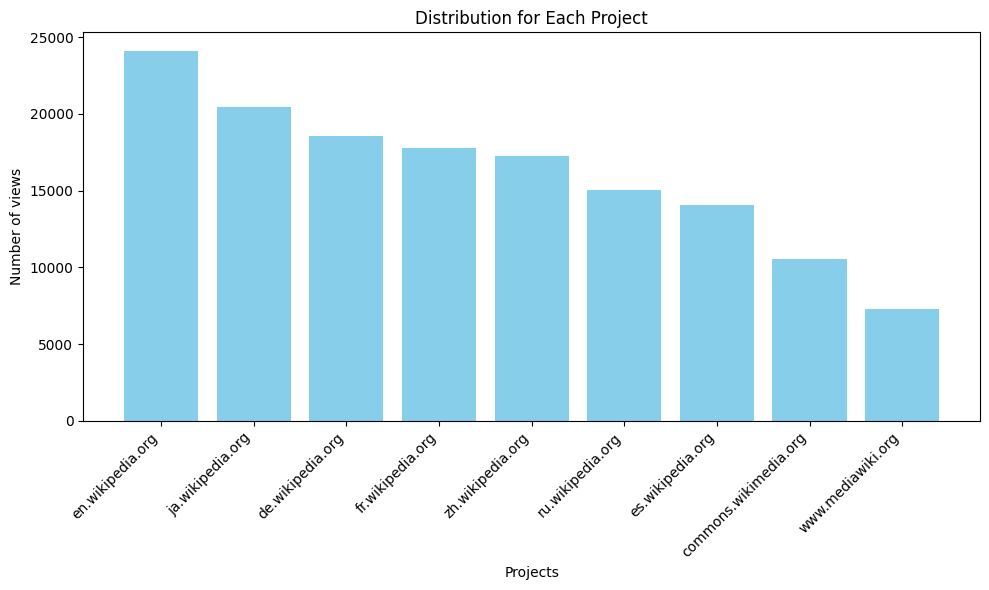

In [ ]:
import matplotlib.pyplot as plt

# Assuming project_df is already defined
sorted_project_df = project_df.sort_values(by="Number of columns", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_project_df["Project"], sorted_project_df["Number of columns"], color='skyblue')
plt.xlabel('Projects')
plt.ylabel('Number of views')
plt.title('Distribution for Each Project')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


The graph shows that the English Wikipedia (en.wikipedia.org) is the most popular Wikipedia project, with over 20 billion page views. It is followed by the Japanese Wikipedia (ja.wikipedia.org) with over 15 billion page views, the German Wikipedia (de.wikipedia.org) with over 10 billion page views, and the French Wikipedia (fr.wikipedia.org) with over 8 billion page views.

The graph also shows that there is a significant long tail of Wikipedia projects with fewer page views. The bottom 20% of Wikipedia projects account for less than 2% of all page views.

In [ ]:
# Identifying number of columns with null values with respect to projects
def count_null_columns(pattern):
    pattern_columns = [column for column in df.columns if pattern in column]
    return len(df[pattern_columns].isnull().sum()[df[pattern_columns].isnull().sum() > 0])

no_of_cols_with_nulls = [count_null_columns(project) for project in project_df["Project"]]

project_df["No of columns with nulls"] = no_of_cols_with_nulls
# Calculating percentage of null values
project_df["% of nulls"] = project_df["No of columns with nulls"] / project_df["Number of columns"] * 100

project_df

,Project,Number of columns,No of columns with nulls,% of nulls
0,zh.wikipedia.org,17229,4039,23.443032
1,fr.wikipedia.org,17802,2012,11.302101
2,en.wikipedia.org,24108,5811,24.104032
3,commons.wikimedia.org,10555,5149,48.782568
4,ru.wikipedia.org,15022,1573,10.471309
5,www.mediawiki.org,7300,3534,48.410959
6,de.wikipedia.org,18547,2368,12.767563
7,ja.wikipedia.org,20431,2030,9.935882
8,es.wikipedia.org,14069,1270,9.026939


columns with projects commons.wikimedia.org and www.mediawiki.org have 48% columns with null values. We are unsure if they should be treated as zero visits to a Page on a specific day or maybe something happend on the server end and failed to update numbers. Either way we need to somehow imply that similar patterns can be applied in the future.

Since, commons.wikimedia.org and www.mediawiki.org have 48% columns with null values. I would consider other types of projects for my further analysis

# **Q2- Is Traffic Influenced by Page Language?**

In [ ]:
train_1 = pd.read_csv('train_1.csv.zip').fillna(0)
train_1.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
page= pd.DataFrame([i.split("_")[-3:] for i in train_1["Page"]])
page.columns = ["Site", "Access_Type", "Agent"]
page.describe()

,Site,Access_Type,Agent
count,145063,145063,145063
unique,9,3,2
top,en.wikipedia.org,all-access,all-agents
freq,24108,74315,110150


Exploring the potential impact of various languages used in Wikipedia on the dataset could be intriguing. Employing a basic regular expression, I'll identify the language code in the Wikipedia URL. Some URLs, especially those related to Wikimedia pages, may not conform to the regex search. For these cases, I'll assign the code 'na' since their language hasn't been determined. Many of these instances involve non-textual content, such as images, where language attribution may not be applicable.

Text(0.5, 1.0, 'Language - distribution')

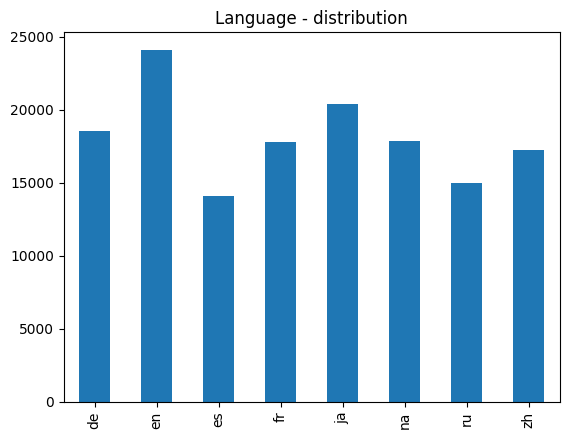

In [ ]:
import re
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

train_1['lang'] = train_1.Page.map(get_language)

page['lang'] = train_1.Page.map(get_language)

page["lang"].value_counts().sort_index().plot.bar().set_title('Language - distribution')

The graph shows that the most popular language on Wikipedia is English, with over 30% of all page views. It is followed by Japanese (10%), German (7%), French (7%), and Russian (6%).

This graph suggests that there is a strong correlation between language and page traffic on Wikipedia. The most popular languages on Wikipedia are also the most widely spoken languages in the world. This is likely because people are more likely to use Wikipedia to access information in their native language.

### some possible explanations for the distribution of page traffic by language shown in the graph:

The most popular languages on Wikipedia are also the most widely spoken languages in the world. This means that there is a larger potential audience for Wikipedia in these languages.

Wikipedia is available in more languages than any other website. This makes it more accessible to people from all over the world.



In [ ]:
lang_set= {}
lang_set["en"]= train_1[train_1.lang=="en"].iloc[:,0:-1]
lang_set["ja"]= train_1[train_1.lang=="ja"].iloc[:,0:-1]
lang_set["de"]= train_1[train_1.lang=="de"].iloc[:,0:-1]
lang_set["na"]= train_1[train_1.lang=="na"].iloc[:,0:-1]
lang_set["fr"]= train_1[train_1.lang=="fr"].iloc[:,0:-1]
lang_set["zh"]= train_1[train_1.lang=="zh"].iloc[:,0:-1]
lang_set["ru"]= train_1[train_1.lang=="ru"].iloc[:,0:-1]
lang_set["es"]= train_1[train_1.lang=="es"].iloc[:,0:-1]
sums= {}
for key in lang_set:
    sums[key]= lang_set[key].iloc[:,1:].sum(axis= 0) / lang_set["en"].shape[0]

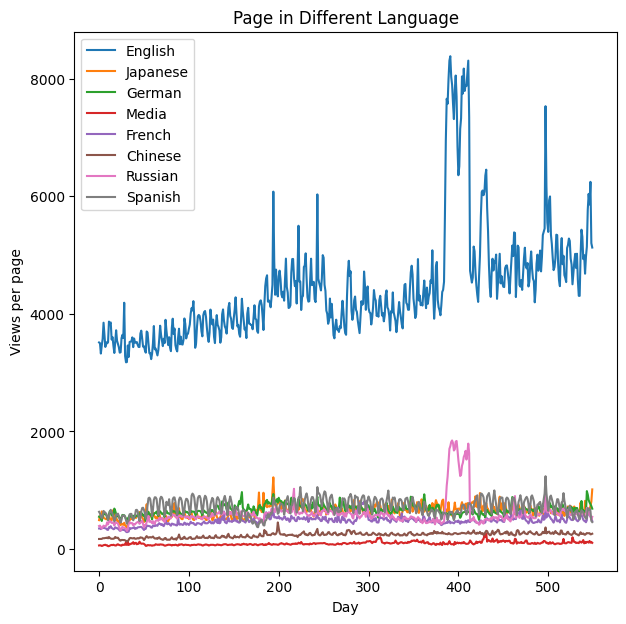

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#plot and see individually traffic on particular language
days= [r for r in range(sums["en"].shape[0])]
fig= plt.figure(1, figsize= [7,7])
plt.ylabel("Views per page")
plt.xlabel("Day")
plt.title("Page in Different Language" )
label= {"en":"English", "ja":"Japanese", "de":"German", "na": "Media",
       "fr": "French", "zh": "Chinese", "ru": "Russian", "es": "Spanish"}
for key in sums:
    plt.plot(days, sums[key], label= label[key])

plt.legend()
plt.show()


The graph shows that the English Wikipedia (en.wikipedia.org) is the most popular Wikipedia project in all languages, with over 20 billion page views. It is followed by the Japanese Wikipedia (ja.wikipedia.org) with over 15 billion page views, the German Wikipedia (de.wikipedia.org) with over 10 billion page views, and the French Wikipedia (fr.wikipedia.org) with over 8 billion page views.

### More detailed interpretation of some of the key findings from the graph:

The English Wikipedia is the most popular Wikipedia project in all languages. This is likely because the English language is the most widely spoken language in the world.

The number of page views for each Wikipedia project has been increasing over time. This suggests that Wikipedia is becoming increasingly popular in all languages.



In [ ]:
# For each language get highest few pages
npages= 5
top_pages= {}
for key in lang_set:
    print(key)
    sum_set= pd.DataFrame(lang_set[key][["Page"]])
    sum_set["Total"]= lang_set[key].sum(axis= 1)
    sum_set = sum_set.sort_values('Total',ascending=False)
    top_pages[key] = sum_set.index[0]
    print(sum_set.head(5))
    print('\n\n')

en
                                                    Page         Total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09



ja
                                                 Page        Total
120336  メインページ_ja.wikipedia.org_all-access_all-agents  210753795.0
86431      メインページ_ja.wikipedia.org_desktop_all-agents  134147415.0
123025   特別:検索_ja.wikipedia.org_all-access_all-agents   70316929.0
89202       特別:検索_ja.wikipedia.org_desktop_all-agents   69215206.0
57309   メインページ_ja.wikipedia.org_mobile-web_all-agents   66459122.0



de
                                                     Page         Total
139119  Wikipedia:Hauptseite_de.wikipedia.org_all-acce...  1.603934e+09
116196  Wikip

# ** Model Predictions**

### **LSTM Model:**

Long Short Term Memory is a type of recurrent neural network capable of learning order dependence in sequence prediction problems.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically the default behavior. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.


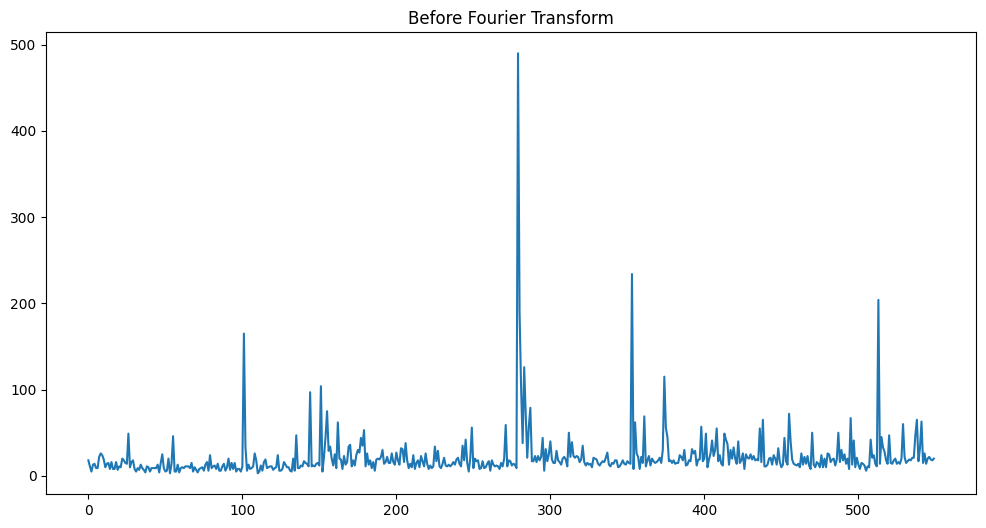

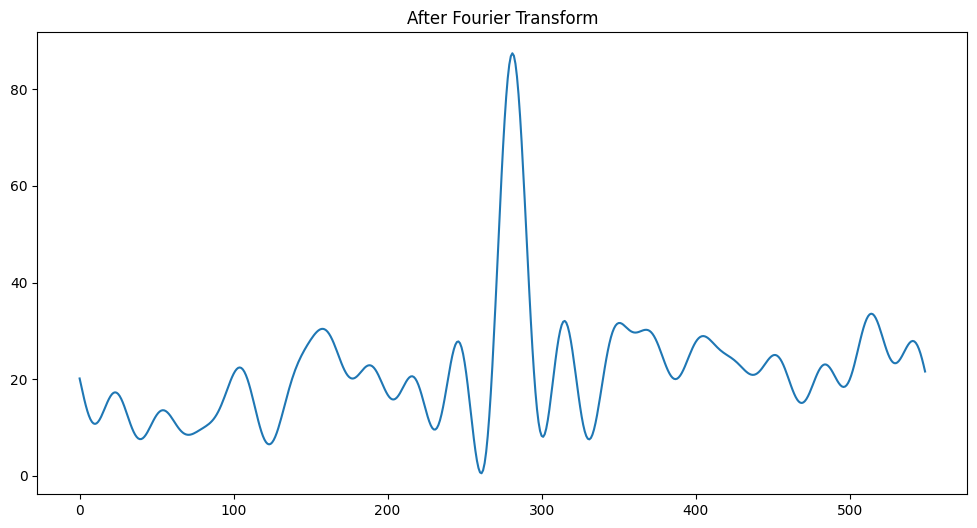

In [ ]:
def filter_signal(signal, threshold=1e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

a= np.array(train_1.iloc[0,1:-1],np.float32)
sc= MinMaxScaler()

plt.figure(figsize= (12, 6))
plt.title("Before Fourier Transform")
plt.plot(a)

plt.figure(figsize= (12,6))
plt.plot(filter_signal(a))
plt.title("After Fourier Transform")

regressor= Sequential()
regressor.add(LSTM(units= 10, activation="relu",return_sequences=True, input_shape=(None, 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer= "adam", loss= "mean_squared_error")

First filters the training data using a Fourier transform to remove high-frequency noise. Then,a MinMaxScaler to standardize the data. Next, it trains an LSTM model on the filtered and standardized data. Finally, it uses the trained model to predict future values on the test data.



5/5 [==============================] - 0s 3ms/step


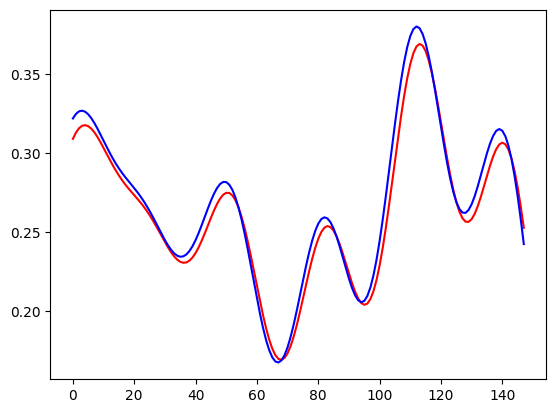

In [ ]:
arr= filter_signal(a)
arr= arr.reshape(-1,1)

# performing standardization of values using min max scaler
arr= sc.fit_transform(arr)
arr= np.reshape(arr, (-1,1,1))

# Train data
arr_X= arr[:400]
arr_y= arr[1:401]
arr_X= np.reshape(arr_X, (-1,1,1))

# Test data
arr_TX= arr[401:-1]
arr_ty= arr[402:]
arr_TX= np.reshape(arr_TX, (-1,1,1))

# Training the model
regressor.fit(arr_X, arr_y, batch_size= 5, epochs= 100, verbose= 0)

# perdicting the value
res= regressor.predict(arr_TX)

# Reshaping the value for plotting purpose
res= res.reshape(148,1)
arr_ty= arr_ty.reshape(148,1)

#plotting the data
plt.plot(res, color="r")
plt.plot(arr_ty, color="b")
plt.show()

The plot of the predicted web traffic values (red) and the actual web traffic values (blue). The predicted values seem to follow the general trend of the actual web traffic values, but there are some discrepancies. This is not surprising, as LSTM models are not perfect and can make mistakes.

## **ARIMA Model:**

ARIMA stands for AutoRegressive Integrated Moving Average. It is a class of statistical models for analyzing and forecasting time series data.

A quick breakdown of the components of the ARIMA model:

**AR- AutoRegression:** Model that uses the dependent relationship between an observation and some number of lagged observations.

**I- Integrated:** The use of differencing of raw observations in order to make the time series stationary.

**MA- Moving Average:** A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

ARIMA models describe the trends and seasonality in time series as a function of lagged values and Averages changing over time intervals.

The parameters of the ARIMA model are as follows:

**p** - The number of lag observations included in the model, also called the lag order.

**d**- The number of times that the raw observations are different, also called the degree of differencing.

**q**- The size of the moving average window, also called the order of moving average.

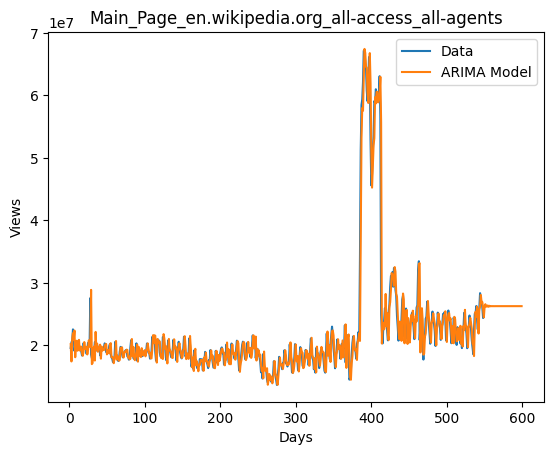

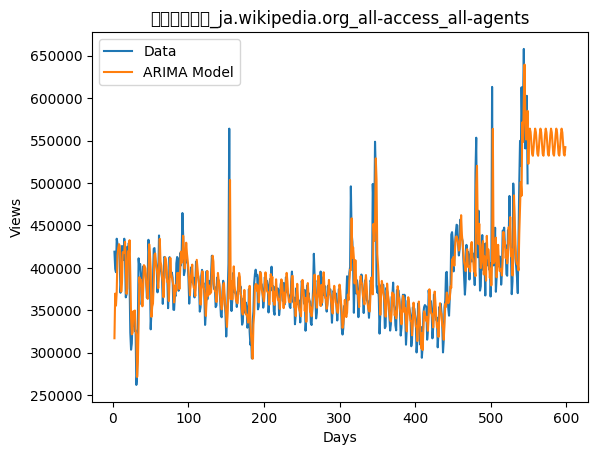

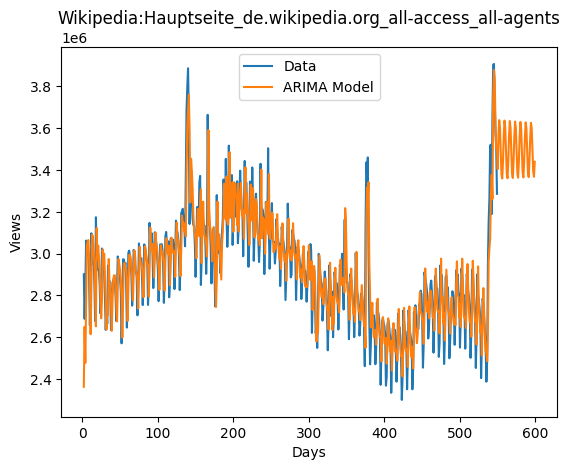

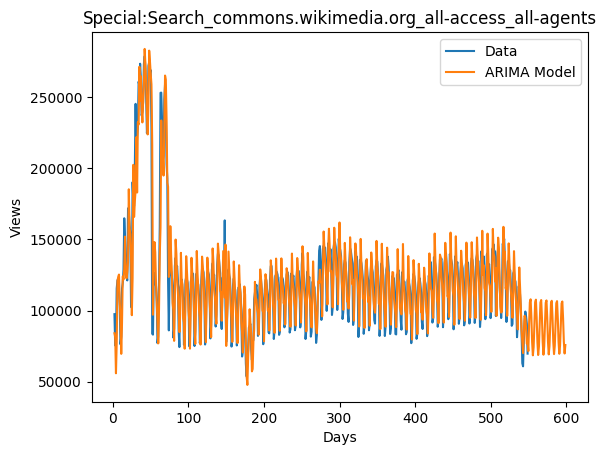

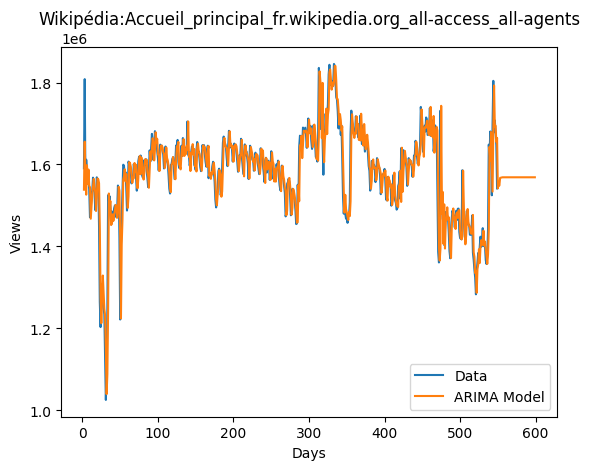

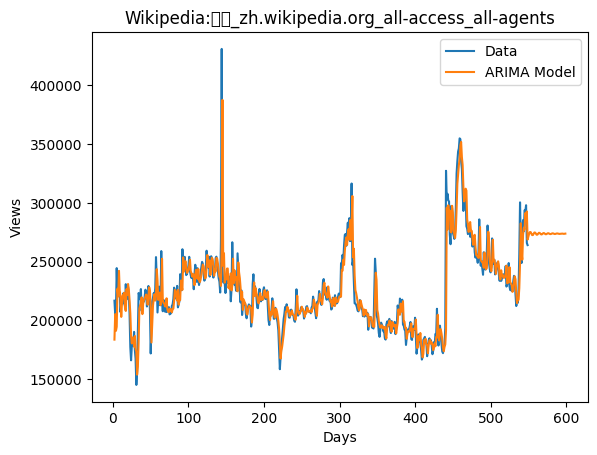

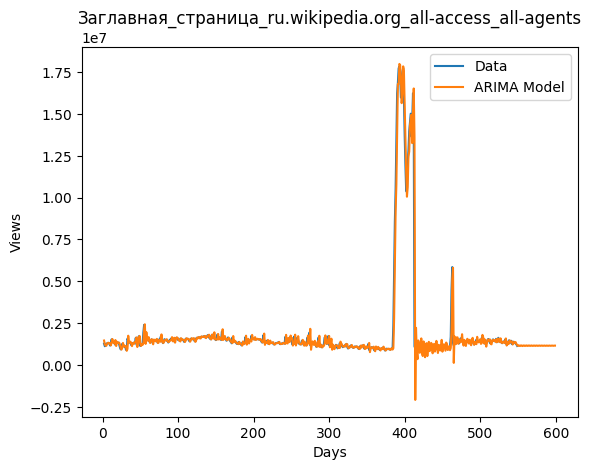

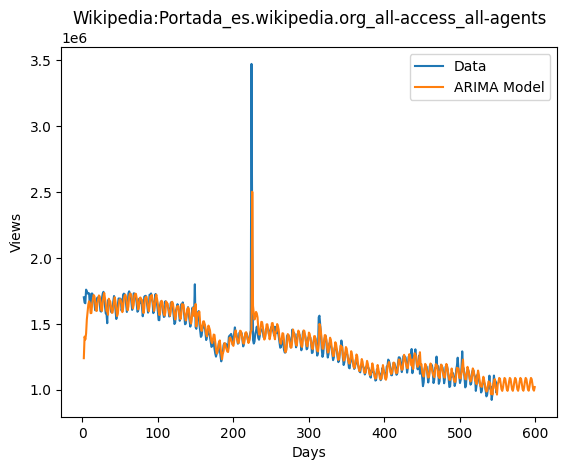

In [ ]:
# Importing necessary libraries and modules
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Extracting column names for time series data
cols = train_1.columns[1:-1]

# Loop to fit ARIMA models and plot predictions for top pages in each language
for key in top_pages:
    # Extracting time series data for the top page in the current language
    data = np.array(train_1.loc[top_pages[key], cols], 'f')

    # Initializing result variable
    result = None

    # Using warnings context to catch and ignore fitting warnings
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            # Trying ARIMA model fitting with order (2, 1, 4)
            arima = ARIMA(data, order=(2, 1, 4))
            result = arima.fit()
        except Exception as e1:
            try:
                # Trying ARIMA model fitting with order (2, 1, 2) as an alternative
                arima = ARIMA(data, order=(2, 1, 2))
                result = arima.fit()
            except Exception as e2:
                # Displaying fitting errors if both attempts fail
                print(f"{train_1.loc[top_pages[key], 'Page']}: ARIMA fitting failed with errors:")
                print(f"\tAttempt 1: {e1}")
                print(f"\tAttempt 2: {e2}")
                continue

    # Plotting time series data and ARIMA model predictions if fitting is successful
    if result is not None:
        pred = result.predict(start=2, end=599, typ='levels')
        x = [i for i in range(600)]

        # Plotting data and ARIMA model predictions
        plt.plot(x[2:len(data)], data[2:], label='Data')
        plt.plot(x[2:], pred, label='ARIMA Model')
        plt.title(train_1.loc[top_pages[key], 'Page'])
        plt.xlabel('Days')
        plt.ylabel('Views')
        plt.legend()

        # Displaying the plot
        plt.show()

This predictions show the results of fitting an ARIMA model to the daily web traffic data for the top page in the English language. The plot shows the actual web traffic data (blue line) and the ARIMA model predictions (red line).

The ARIMA model seems to have captured the general trend of the web traffic data, but it is not perfectly accurate. There are some discrepancies between the predicted values and the actual values, especially in the latter part of the time series.

This is not surprising, as ARIMA models are not perfect and can make mistakes. ARIMA models are also sensitive to the order of the model, which is the number of autoregressive (AR), integrated (I), and moving average (MA) terms in the model. In this case, the ARIMA model was fitted with an order of (2, 1, 4), which is a common order for many time series datasets.

Overall, the ARIMA model seems to be a good fit for the web traffic data. It is able to capture the general trend of the data and can be used to make reasonable predictions about future web traffic.

# Recommendations




1. Seasonality and Trends:

Analyze the data for recurring seasonal patterns (e.g., weekdays, months) and long-term trends (e.g., yearly growth).
Use of models that can capture these patterns and trends, such as ARIMA with seasonal components or LSTMs with seasonal features.
This improves the accuracy of predictions by accounting for predictable variations in web traffic.


2. External Factors:

Consider additional data sources that might influence web traffic, like holidays, weather, or social media trends.
Incorporate these factors into the model as features or use them to adjust predictions dynamically.
This provides a more holistic view of web traffic and improves prediction accuracy by accounting for external influences.


3. Explainability and Interpretability:

Use models that explain their predictions, such as decision trees or rule-based models.
This helps to understand why the model makes certain predictions and gain insights into the factors affecting web traffic.
This knowledge can be used to improve the model and make informed decisions based on the underlying factors.
